In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import tensorflow as tf
from tensorflow import keras

def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    """
    return np.random.choice([0, 1], size=(n, n), p=[prob, 1-prob])



In [2]:
def writing_data(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    mat = []
    vd = np.zeros(samples)
    for ind in range(samples):
        b = grid(n, prob)
        mat.append(cp.copy(b)) #Used copy to not have 2 on the matrix
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    vd[ind] = 1
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
    return np.array(mat),vd

# Build a model

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(11, 11)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Make the Training data

In [4]:
#traning data
td,tr = writing_data(1000,11,0.5)

# Show sample of data

In [5]:
td[0], tr[0]

(array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
        [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]]), 1.0)

# Training the model

In [6]:
model.fit(td,tr, epochs = 12)

Epoch 1/12
1000/1000 [==============================] - 0s 239us/sample - loss: 0.6640 - acc: 0.6350
Epoch 2/12
1000/1000 [==============================] - 0s 82us/sample - loss: 0.5820 - acc: 0.6930
Epoch 3/12
1000/1000 [==============================] - 0s 98us/sample - loss: 0.5201 - acc: 0.7650
Epoch 4/12
1000/1000 [==============================] - 0s 101us/sample - loss: 0.4384 - acc: 0.8150
Epoch 5/12
1000/1000 [==============================] - 0s 76us/sample - loss: 0.3605 - acc: 0.8700
Epoch 6/12
1000/1000 [==============================] - 0s 86us/sample - loss: 0.2996 - acc: 0.8950
Epoch 7/12
1000/1000 [==============================] - 0s 93us/sample - loss: 0.2444 - acc: 0.9220
Epoch 8/12
1000/1000 [==============================] - 0s 86us/sample - loss: 0.1687 - acc: 0.9540
Epoch 9/12
1000/1000 [==============================] - 0s 86us/sample - loss: 0.1081 - acc: 0.9830
Epoch 10/12
1000/1000 [==============================] - 0s 81us/sample - loss: 0.0810 - acc: 0.98

# Testing the model

In [7]:
test_mat,test_v = writing_data(1000,11,0.6)
test_loss, test_acc = model.evaluate(test_mat, test_v)
print('Test accuracy:', test_acc)

1000/1000 [==============================] - 0s 91us/sample - loss: 0.3904 - acc: 0.8680
('Test accuracy:', 0.868)


# Plotting the probability versus the accuracy of the method

We have a plot that shows that the accuracy decreases on the critical probability for the model.

The way to acquire data for the plot is given in the line below the plot

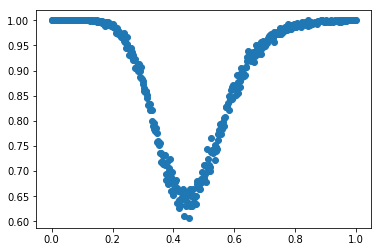

In [9]:
plt.plot(probability,acc, 'o')
plt.show()

In [8]:
probability = np.linspace(0.,1.,500)
acc = np.zeros(len(probability))
for i,v in enumerate(probability):
    #test data
    test_mat,test_v = writing_data(1000,11,v)
    #evaluate accuracy
    test_loss, test_acc = model.evaluate(test_mat, test_v)
    acc[i] = test_acc

1000/1000 [==============================] - 0s 38us/sample - loss: 0.0400 - acc: 0.9940


1000/1000 [==============================] - 0s 38us/sample - loss: 0.8354 - acc: 0.7190


1000/1000 [==============================] - 0s 34us/sample - loss: 0.8031 - acc: 0.7440


1000/1000 [==============================] - 0s 42us/sample - loss: 0.1040 - acc: 0.9650


1000/1000 [==============================] - 0s 57us/sample - loss: 0.0123 - acc: 0.9970


1000/1000 [==============================] - 0s 59us/sample - loss: 0.0905 - acc: 1.0000
